In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Fazendo a leitura dos dados
x = pd.read_csv('Ex1_x', delim_whitespace=True).to_numpy()
y = pd.read_csv('Ex1_y', delim_whitespace=True).to_numpy()
t = pd.read_csv('Ex1_t', delim_whitespace=True).to_numpy()

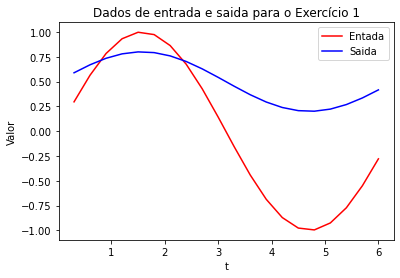

In [3]:
# Plotando os dados iniciais
plt.plot(t, x, 'r', label='Entada')
plt.plot(t, y, 'b', label='Saida')
plt.legend()
plt.title('Dados de entrada e saida para o Exercício 1')
plt.ylabel('Valor')
plt.xlabel('t')
plt.show()

In [4]:
def trainadaline (xin, yd, eta, tol, maxepocas):
    
    '''
    Função que aplica o metodo Adaline
    yd: tem que ser garado para as xin (concatenado xall), metade 0 e metade 1
    xin: Entrada Nxn de dados de matriz
    eta: Peso de atualizacao do passo
    tol: tolerancia do erro
    maxepocas: numero maximo de epocas permitido
    retorna:
        - wt: parametros da função avaliada
        - evec: erro médio por época
    '''

    N = xin.shape[0]  #recebe as linhas
    n = xin.shape[1] # recebe as colunas
    xin = np.append(np.ones((N,1)), xin,axis = 1 )

    wt = np.random.randn(n+1, 1)*0.01

    nepocas = 0
    eepoca = tol+1
    # inicializa vetor erro evec 
    evec = np.empty([maxepocas+1, 1])
    while ((nepocas < maxepocas) and (eepoca>tol)): #eepocas erro da epoca e tol tolerancia
        ei2 = 0
        #sequencia aleatoria para treinamento
        if (nepocas+1)%10 == 0:
            print(f'Epoca: {nepocas+1}') 
        xseq = (np.arange(N))
        np.random.shuffle(xseq)
        for i in range(N):
            #padrao para sequencia aleatoria
            irand = xseq[i]
            yhati = np.matmul(xin[None, irand, :], wt)
            ei = yd[irand]-yhati
            dw = eta * ei * xin[None, irand, :]
            #atualizacao do peso w
            wt = wt + dw.T
            #erro acumulado
            ei2 = ei2+ei*ei
        #numero de epocas
        nepocas = nepocas+1
        evec[nepocas] = ei2/N
        #erro por epoca
        eepoca = evec[nepocas]
    return wt, evec[1:nepocas]

In [5]:
def yadaline(xin, w):

    '''
    Função que retorna a saída de um sistema cujo parametros foram obtidos usando a função trainadaline
    xin: vetor x de entrada
    w: parametros a serem considerados
    retorna: vetor y correspondente ao modelo com parametros w
    '''

    return np.matmul(np.append(np.ones((xin.shape[0],1)), xin,axis = 1 ), wt)

In [6]:
# Separar dados de treino e de teste
x_train = x[[0, 1, 2, 3, 5, 6, 8, 9, 10, 12, 15, 16, 18, 19]]
y_train = y[[0, 1, 2, 3, 5, 6, 8, 9, 10, 12, 15, 16, 18, 19]]
x_test = x[[4, 7, 11, 13, 14, 17]]
y_test = y[[4, 7, 11, 13, 14, 17]]
t_test = t[[4, 7, 11, 13, 14, 17]]
t_train = [[0, 1, 2, 3, 5, 6, 8, 9, 10, 12, 15, 16, 18, 19]]

In [7]:
# Aplicando funções trainadaline e yadaline
wt, evec = trainadaline (x_train, y_train, 0.1, 0.0001, 50)
y_prev = yadaline(x_test, wt)
y_prev_des = yadaline(x, wt)

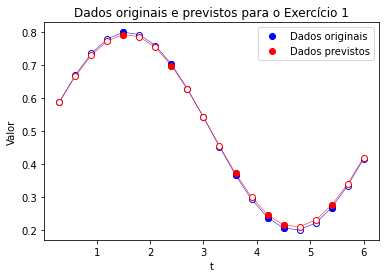

In [8]:
# Plotando o gráfico de dados previstos e originais
plt.plot(t, y, '-o', color = 'b', lw=0.5, markerfacecolor='white', markeredgecolor='b')
plt.plot(t, y_prev_des, '-o', color='red', lw=0.5, markerfacecolor='white', markeredgecolor='r')
plt.plot(t_test, y_test, 'bo', label='Dados originais')
plt.plot(t_test, y_prev, 'ro', label='Dados previstos')
plt.legend()
plt.title('Dados originais e previstos para o Exercício 1')
plt.ylabel('Valor')
plt.xlabel('t')
plt.show()

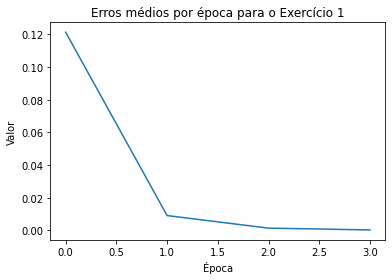

In [9]:
# Plotando o grafico do erro medio do sistema
plt.plot(evec)
plt.title('Erros médios por época para o Exercício 1')
plt.ylabel('Valor')
plt.xlabel('Época')
plt.show()

In [10]:
# Verificando valores de wt
wt

array([[0.50134351],
       [0.29177457]])